In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Analysis of Heuristics for Isolation
*by Bryan Travis Smith*

As part of the [Udacity AI NanoDegree](https://www.udacity.com/ai), we complete a lesson on playing games.  That section covers the concept of game trees.  A game tree a set of nodes and edges where each node in the tree is a state a game could be in and each edge is a move that connects one state to another.   We also learn about evaluation functions, which describe the value assocated with a node.  Many games have game trees so large that make computing them impractical.  When this happens it is impossible to know the exact value of any node.  An approximation must be used, and this is where heuristic functions are used.  A heurisitc function can be thought as a common sense evaluation of a game state/board.  

As part of the project for the game playing section, we have to implement a game playing agent that plays a modified version of the game Isolation.  In this version, each piece moves like a knight from chess.  We are to implement three different heuristic functions, and compare their performance against a standard agent defined and provided by Udacity. 

## Search Algorithms

We were taught about searching algorithms for game trees, and had to implement two: [MiniMax](https://en.wikipedia.org/wiki/Minimax) and [Alpha-Beta Pruning](https://en.wikipedia.org/wiki/Alpha%E2%80%93beta_pruning)

We also implemented the iterative deeping search strategy that will continue to search the tree deeper and deeper until a timeout is hit.  When the timeout is hit, the best move found within that time is returned.

## Standard Agent - ID_Imporved

Udacity provided a standard agent to  compare our agent to.  This agent implemented an Alpha-Beta search strategy with with iterative deepening being used.  The evaluation of each state uses a heuristic function that is the number of moves the curent player has minus the number of moves the opponent player has.

## Opponent Agents 

Udacity provided 7 agents to compare our performance to.  For each match, each player is set in a randome space.  Then the agents play the match.  They are not allowed to choose the first square.   The agents follow:

1.  Random - Random Moves
2.  MM_Null - Minimax with depth 3 and heuristic the returns zero unless someone wins
3.  MM_Open - Minimax with depth 3 and heuristic that returns the number of open moves for the player unless someone wins
4.  MM_Improved - Minimax with depth 3 and heuristic that returns the difference in the number of open moves for the two player unless someone wins
5.  AB_Null - Alpha-Beta with depth 5 and heuristic the returns zero unless someone wins
6.  AB_Open - Alpha-Beta with depth 6 and heuristic that returns the number of open moves for the player unless someone wins
7.  AB_Improved - Minimax with depth 6 and heuristic that returns the difference in the number of open moves for the two player unless someone wins

## Standard Agent vs Oppent Agents

In a sample of 100 rounds for each match with a timeout of 150 ms, we have the following results of the agents playing each other.

150 ms Timeout
```
*************************
 Evaluating: ID_Improved 
*************************

Playing Matches:
----------
  Match 1: ID_Improved vs   Random    	Result: 15 to 5
  Match 2: ID_Improved vs   MM_Null   	Result: 18 to 2
  Match 3: ID_Improved vs   MM_Open   	Result: 13 to 7
  Match 4: ID_Improved vs MM_Improved 	Result: 14 to 6
  Match 5: ID_Improved vs   AB_Null   	Result: 16 to 4
  Match 6: ID_Improved vs   AB_Open   	Result: 10 to 10
  Match 7: ID_Improved vs AB_Improved 	Result: 12 to 8

Results:
----------
ID_Improved         70.00%
```

We see that Stanard Agent does much better than random moves, and does well against the null heuristic.  The search strategy in either case does not yield a big different, but the interative deepening does seem to yield a slight increased performance.  The error bars on the match count is ~ 5 wins.

## Student Agent and Heuristics

The only difference between the Udacity provided Standard Agent and the Student agent is the heuristic function used to value game-states.   We were instructed to come up with three heuristic functions and evaluate the performance against the standard agent.   

### Heuristic 1 - Reduce Opponent's Moves

The first heuristic function I used was similar in spirit to the improve function.  The difference is the goal is to reduce the number of move of the opponent relative to our moves.  Having proportionally less move is a better position.  It also says that having proportionally less moves later into the game is better.  

```python
def custom_heuristic_opp_has_less_moves_end_game(game, player):
    """Calculate the heuristic value of a game state from the point of view
    of the given player by finding the weighted sum


    Parameters
    ----------
    game : `isolation.Board`
        An instance of `isolation.Board` encoding the current state of the
        game (e.g., player locations and blocked cells).

    player : object
        A player instance in the current game (i.e., an object corresponding to
        one of the player objects `game.__player_1__` or `game.__player_2__`.)

    Returns
    ----------
    float
        The heuristic value of the current game state to the specified player.
    """
    own_moves = len(game.get_legal_moves(player))
    opp_moves = len(game.get_legal_moves(game.get_opponent(player)))
    close_spaces = game.height * game.width - len(game.get_blank_spaces())
    if player == game.inactive_player and opp_moves == 0:
        return float("inf")
    if player == game.active_player and own_moves == 0:
        return float("-inf")

    return -(opp_moves + 0.5) / (own_moves + 0.5) * close_spaces
``` 


### Performance of Heuristic 1

150 ms timeout
```
*************************
Evaluating: Student Opp Less
*************************

Playing Matches:
----------
  Match 1: Student Opp Less vs   Random    	Result: 18 to 2
  Match 2: Student Opp Less vs   MM_Null   	Result: 16 to 4
  Match 3: Student Opp Less vs   MM_Open   	Result: 14 to 6
  Match 4: Student Opp Less vs MM_Improved 	Result: 11 to 9
  Match 5: Student Opp Less vs   AB_Null   	Result: 14 to 6
  Match 6: Student Opp Less vs   AB_Open   	Result: 14 to 6
  Match 7: Student Opp Less vs AB_Improved 	Result: 15 to 5

Results:
----------
Student Opp Less     72.86%
```

In this case it does look like the heuristic performed better than the standard agent in against the Alpha-Beta pruning with a fixed depth of 5. 


### Heuristic 2 - Move Center of Board

My second heuristic was to weight playing the center of the board more favorably because I noticed while playing that the conditions that lead to the player winning the most is moving first and moving in the center.  I made a heuristic that says no matter what, being in the center is better than being on the edges of the board.  The code check for the heuristic is below:

```python
def custom_heuristic_center(game, player):
    """Calculate the heuristic value of a game state from the point of view
    of the given player.

    Parameters
    ----------
    game : `isolation.Board`
        An instance of `isolation.Board` encoding the current state of the
        game (e.g., player locations and blocked cells).

    player : object
        A player instance in the current game (i.e., an object corresponding to
        one of the player objects `game.__player_1__` or `game.__player_2__`.)

    Returns
    ----------
    float
        The heuristic value of the current game state to the specified player.
    """
    if game.is_loser(player):
        return float("-inf")

    if game.is_winner(player):
        return float("inf")

    loc = game.get_player_location(player)
    r1 = loc[0] - floor(game.height / 2)
    r2 = loc[1] - floor(game.width / 2)
    r = sqrt(r1**2 + r2**2)
    return exp(-r)

```


### Performance of Heuristic 2

150 ms timeout
```
*************************
Evaluating: Student Center
*************************

Playing Matches:
----------
  Match 1: Student Center vs   Random    	Result: 15 to 5
  Match 2: Student Center vs   MM_Null   	Result: 11 to 9
  Match 3: Student Center vs   MM_Open   	Result: 11 to 9
  Match 4: Student Center vs MM_Improved 	Result: 11 to 9
  Match 5: Student Center vs   AB_Null   	Result: 16 to 4
  Match 6: Student Center vs   AB_Open   	Result: 10 to 10
  Match 7: Student Center vs AB_Improved 	Result: 12 to 8

Results:
----------
Student Center      61.42%
```

In this case the performance is not better than the stardard agent.  Trying to stay in or control the center is not a better heuristic than the improve heuristic used by the standard agent

### Heuristic 3 - Take Away Move

This heuristic is an aggressive heuristic that scores moves where you can take away moves from the opponent as higher.  The more moves that can be taken away over the number of moves left to the oppontent, the higher the heuristic scores the game state.  

```python
def custom_heuristic_takeway_moves(game, player):
    """Calculate the heuristic value of a game state from the point of view
    of the given player.

    Parameters
    ----------
    game : `isolation.Board`
        An instance of `isolation.Board` encoding the current state of the
        game (e.g., player locations and blocked cells).

    player : object
        A player instance in the current game (i.e., an object corresponding to
        one of the player objects `game.__player_1__` or `game.__player_2__`.)

    Returns
    ----------
    float
        The heuristic value of the current game state to the specified player.
    """
    if game.is_loser(player):
        return float("-inf")

    if game.is_winner(player):
        return float("inf")

    opponent = game.get_opponent(player)
    own_moves = game.get_legal_moves(player)
    own_locations = tuple(map(operator.add, [game.get_player_location(player)] * len(own_moves), own_moves))

    opp_moves = game.get_legal_moves()
    opp_locations = tuple(map(operator.add, [game.get_player_location(opponent)] * len(opp_moves), opp_moves))

    if len(opp_locations) == 0:
        return float("inf")

    opp_left_over_locations = set(opp_locations) - set(own_locations)
    return (len(opp_locations) - len(opp_left_over_locations)) / len(opp_locations)
```


### Performance of Heuristic 3

150 ms timeout
```
*************************
Evaluating: Student Take Away
*************************

Playing Matches:
----------
  Match 1: Student Take Away vs   Random    	Result: 14 to 6
  Match 2: Student Take Away vs   MM_Null   	Result: 13 to 7
  Match 3: Student Take Away vs   MM_Open   	Result: 11 to 9
  Match 4: Student Take Away vs MM_Improved 	Result: 9 to 11
  Match 5: Student Take Away vs   AB_Null   	Result: 12 to 8
  Match 6: Student Take Away vs   AB_Open   	Result: 8 to 12
  Match 7: Student Take Away vs AB_Improved 	Result: 10 to 10

Results:
----------
Student Take Away     55.00%
```

The take away heuristic is the worst performing heurisitc, not significantly beating anything other than the random strategy.  

## Summary of Performance 

Heuristic functions have a clear effect on the performance when using adversarial search strategies like minimax and alpha-beta pruning.   In this example with modified isolation, we see that if the heuristic does not correctly represent a value of a board configuration, the agent using that heuristic will perform sub-optimally.  

Below is a grpah of of the win ratio of the heuristic against the 7 test cases provided by Udacity.   The improve heurisitic and the less opponent moves heurisit both out perform the other heuristics.   The 

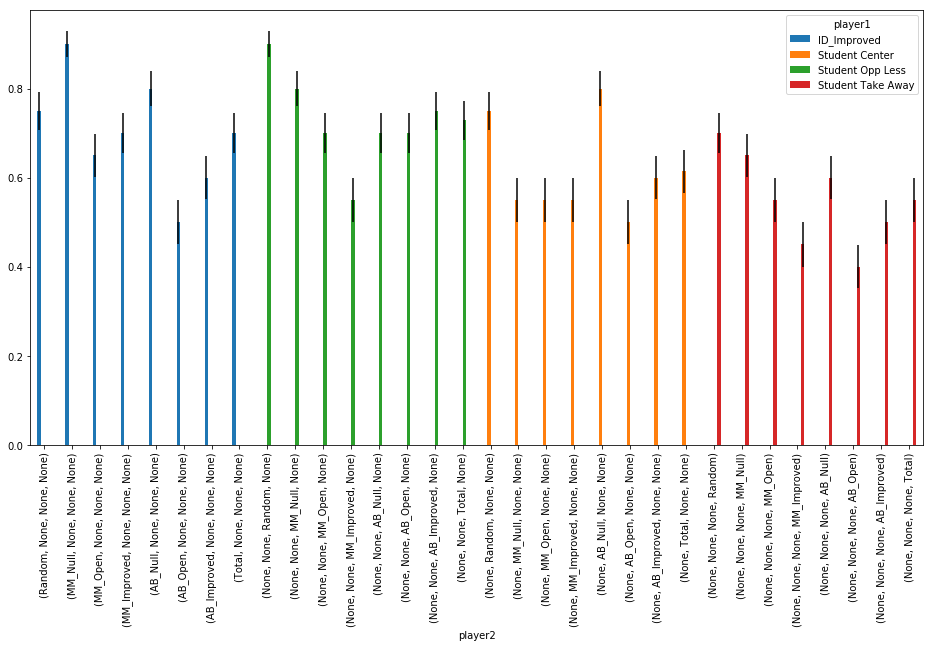

In [2]:
d = {
    'player1': ['ID_Improved'] * 8 + ['Student Opp Less'] * 8 + ['Student Center'] * 8 + ['Student Take Away'] * 8,
    'player2': ['Random', 'MM_Null', 'MM_Open', 'MM_Improved', 'AB_Null', 'AB_Open', 'AB_Improved', 'Total'] * 4,
    'wins':[15, 18, 13, 14, 16, 10, 12, 98]+[18, 16, 14, 11, 14, 14, 15, 102] + [15, 11, 11, 11, 16, 10, 12, 86] + \
        [14, 13, 11, 9, 12, 8, 10, 77],
    'counts': [20, 20, 20, 20, 20, 20, 20, 140]*4
}
results = pd.DataFrame(d)
results.loc[:,'percent'] = results.wins/results.counts
results.loc[:,'sterr'] = np.sqrt(results.percent * (1 - results.percent) / 100)
results.set_index('player1',append=True).unstack().plot.bar(x='player2',y='percent',yerr='sterr',figsize=(16,8))

Visually, it is easy to see that ID_Improve and Student Opp Less out performed the other two heuristics.  It seems that the Student Opp Less has a slightly better performance than ID_Improve.  To know which algorithm is better we have to have them play each other. 

# ID_Improve vs Student Opp Less

Part of the goal of this project is to come up with a heuristic that outperforms the Standard Agent given to us by Udacity that uses the imporve heuristic with iterative deeping. The following results were seen in 500 matches:

150 ms timeout
```
*************************
Evaluating: Student Opp Less
*************************

Playing Matches:
----------
  Match 7: Student Opp Less vs ID_Improved 	Result: 249 to 500

Results:
----------
Student Opp Less     49.80%
```

# Conclusion

This project exposed us to adversarial search strategies, requiring us to implement Minimax, Alpha-Beta Pruning, and Iterative Deeping.  Additionaly, we were required to develop heuristics that approximated the value of any game state so that our adversarial search methods could select the moves that had the best value.  Getting this value wrong for states will lead any search strategy, no matter how good, to not select the optimal states.  

I was able to discover a heuristic different from those provided that performed as well as the udacity provided heuristic.  In 500 matches, there was not a statistically significant difference in their performance.  Coming up with a heuristic that strictly dominates ID_Improve is not straight forward.  I suspect that developing a good heuristic is more art than science, and requires an intuition for the game that I have not developed yet.